


##1. Setup and Libraries :

In [5]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn plotly flask fastapi uvicorn -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fastapi import FastAPI
import uvicorn

In [6]:
# Load dataset
file_path = '/content/family_financial_and_transactions_data.xlsx'

In [7]:
# Read the Excel file and check sheet names
excel_data = pd.ExcelFile(file_path)
print(excel_data.sheet_names)

['final_family_financial_and_tran']


In [8]:
# Load the first sheet into a DataFrame (adjust if needed)
df = pd.read_excel(file_path, sheet_name=excel_data.sheet_names[0])

In [9]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


## Insights Visualization:

In [10]:
category_spending = df[['Category', 'Amount']].groupby('Category').sum().reset_index()
fig = px.pie(category_spending, names='Category', values='Amount', title="Spending Distribution Across Categories")
fig.show()

## 2. Build the Financial Scoring Model

In [17]:

def calculate_score(data):
    # Example formula for scoring - adjust as per your requirements
    savings_to_income = (data['Savings'] / data['Income']) * 100
    expenses_to_income = (data['Monthly Expenses'] / data['Income']) * 100
    loan_to_income = (data['Loan Payments'] / data['Income']) * 100
    credit_card_spending = (data['Credit Card Spending'] / data['Income']) * 100
    goals_met = data['Financial Goals Met (%)']  # Already in percentage

    # Assign weights to each factor (adjust weights as needed)
    score = (savings_to_income * 0.2) + ((100 - expenses_to_income) * 0.15) + \
            ((100 - loan_to_income) * 0.15) + ((100 - credit_card_spending) * 0.1) + \
            (goals_met * 0.15)

    return score

In [18]:
# Apply the scoring function to the dataset
df['Financial_Score'] = df.apply(calculate_score, axis=1)

In [19]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Financial_Score
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68,52.414612
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68,52.414612
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68,52.414612
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68,52.414612
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68,52.414612


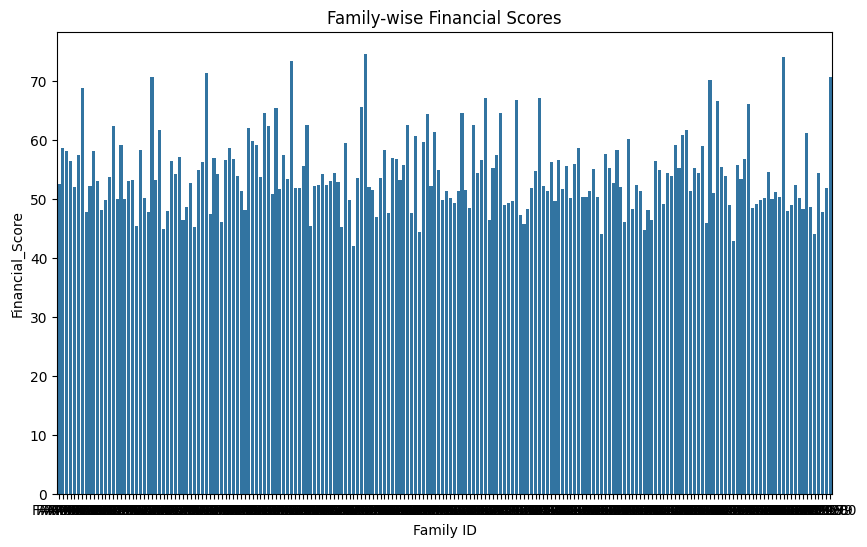

In [20]:
# Family-wise Financial Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Family ID', y='Financial_Score', data=df)
plt.title("Family-wise Financial Scores")
plt.show()

In [21]:
df.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)',
       'Financial_Score'],
      dtype='object')

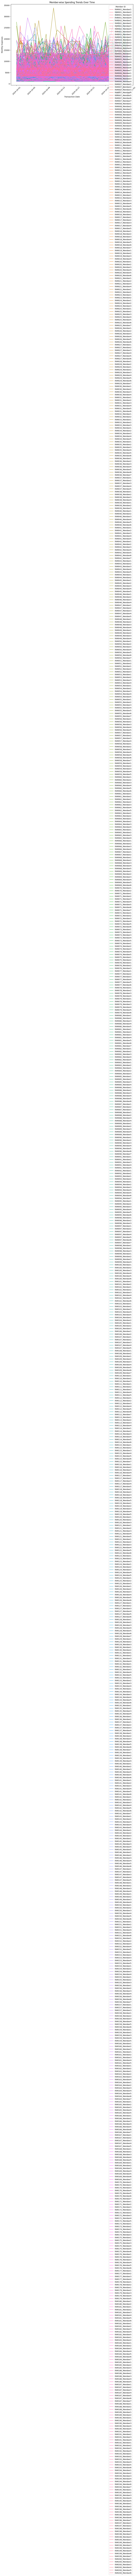

In [22]:
# Member-wise Spending Trends (assuming 'Member ID' and 'Transaction Date' columns)
df_member_spending = df[['Member ID', 'Transaction Date', 'Monthly Expenses']].groupby(['Member ID', 'Transaction Date']).sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Transaction Date', y='Monthly Expenses', hue='Member ID', data=df_member_spending)
plt.title("Member-wise Spending Trends Over Time")
plt.xticks(rotation=45)
plt.show()

# 3. Deploy the Model: Expose the scoring model as an API using Flask or FastAPI

In [23]:

# For simplicity, we will provide the basic structure for Flask

from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route('/get_financial_score', methods=['POST'])
def get_financial_score():
    # Get input JSON data
    data = request.get_json()

    # Convert input data to a pandas dataframe
    input_data = pd.DataFrame(data)

    # Calculate the financial score
    input_data['Financial_Score'] = input_data.apply(calculate_score, axis=1)

    # Return the financial score as part of the response
    result = input_data[['Family ID', 'Member ID', 'Financial_Score']].to_dict(orient='records')

    return jsonify(result)

# Run the Flask application
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5001)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.28.0.12:5001
INFO:werkzeug:Press CTRL+C to quit


# 4. AI/ML: Predict next month's expenses or savings trends using linear regression:

In [24]:

# Prepare the data for model training
df['Month'] = pd.to_datetime(df['Transaction Date']).dt.month
df['Year'] = pd.to_datetime(df['Transaction Date']).dt.year
df['Date'] = pd.to_datetime(df['Transaction Date'])

In [25]:
# Feature selection (using previous month's expenses to predict next month's)
X = df[['Month', 'Year', 'Income', 'Loan Payments', 'Credit Card Spending']]
y = df['Monthly Expenses']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the next month's expenses
y_pred = model.predict(X_test)

In [35]:
# Calculate MAE for the predictions
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) of the model: {mae}')

Mean Absolute Error (MAE) of the model: 1403.0540080497442


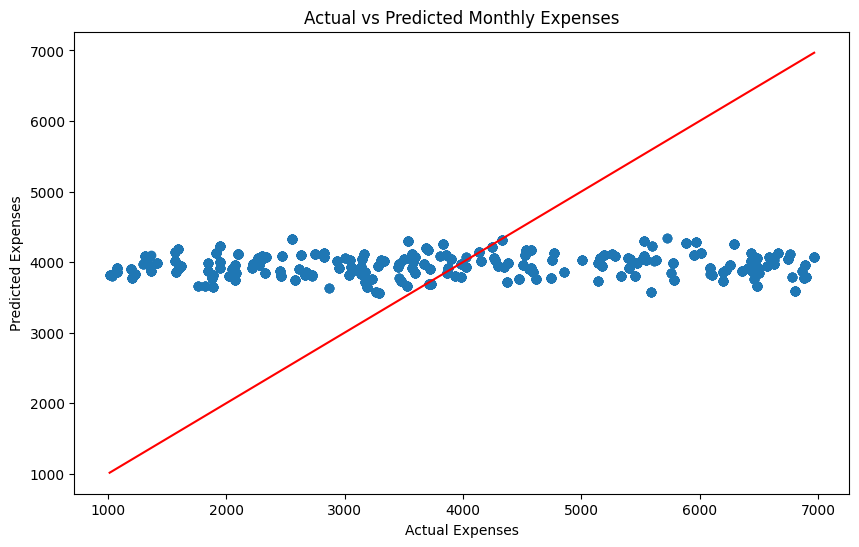

In [36]:
# Plot actual vs predicted expenses
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Monthly Expenses')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()